# Analyzing Student Academic Performance Factors
Developed by Hayley Hawkins




## 1. Introduction

This dataset describes the various factors that affect student performance in exams. In includes information on attendance, study habits, parental involvement and influence, as well as other factors that might influence academic success. This dataset was downloaded from Kaggle, which is an online data science platform with thousands of ready-to-use datasets.  

The objectives of this study is to analyze how different aspects of student life impact performance on an exam. I am interested in comparing how certain factors improve student scores. As a student myself, it will be interesting to gain some insight on the study habits that help students get better exam scores.

The main variables in my study include attendance, number of tutoring sessions, parental involvement, family income, and exam score. To do this, I will be analyzing whether attendance or tutoring sessions have a greater impact on how well students do on an exam. Additionally, I will be analyzing how two categorical variables- parental involvement and family income- impact academic performance.

### Hypotheses
1. What has a greater influence on a student's exam score, attendance or tutoring sessions?  
2. Is parental involvement a factor in a student's exam score?
3. Is family income associated with better academic performance?


## 2. Data Analysis




In [ ]:
pip install pandas openpyxl

In [ ]:
# Import data

import pandas as pd
data = pd.read_excel('/content/StudentPerformanceFactors.xlsx')

In [ ]:
# Import libraries for EDA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data.shape
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   object
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data['Attendance'] = pd.to_numeric(data['Attendance'], errors='coerce')

# Drop rows where 'Attendance' is NaN
data = data.dropna(subset=['Attendance'])

data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.975477,79.976234,7.028913,75.068423,1.493491,2.967605,67.235089
std,5.991036,11.547927,1.468183,14.399854,1.230524,1.031309,3.890475
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


### 2-4. Generate Sub-dataset

In [ ]:

myvariables = ['Attendance', 'Tutoring_Sessions', 'Parental_Involvement', 'Family_Income', 'Exam_Score']

# Subset the data
df = data[myvariables]
df.head()


,Attendance,Tutoring_Sessions,Parental_Involvement,Family_Income,Exam_Score
0,84.0,0,Low,Low,67
1,64.0,2,Low,Medium,61
2,98.0,2,Medium,Medium,74
3,89.0,1,Low,Medium,71
4,92.0,3,Medium,Medium,70


In [ ]:

df = df.rename(columns={'Attendance': 'Attendance',
                        'Parental_Involvement': 'Involvement',
                        'Family_Income': 'Income',
                        'Exam_Score': 'Score',
                        'Tutoring_Sessions': 'Tutoring'})
df.head()

,Attendance,Tutoring,Involvement,Income,Score
0,84.0,0,Low,Low,67
1,64.0,2,Low,Medium,61
2,98.0,2,Medium,Medium,74
3,89.0,1,Low,Medium,71
4,92.0,3,Medium,Medium,70


In [ ]:

df.isnull().sum()

,0
Attendance,0
Tutoring,0
Involvement,0
Income,0
Score,0


In [ ]:
#Check if there are duplicated values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1620, 5)


In [ ]:
df.count()

,0
Attendance,6606
Tutoring,6606
Involvement,6606
Income,6606
Score,6606


In [ ]:
df = df.drop_duplicates()
df.head(5)

,Attendance,Tutoring,Involvement,Income,Score
0,84.0,0,Low,Low,67
1,64.0,2,Low,Medium,61
2,98.0,2,Medium,Medium,74
3,89.0,1,Low,Medium,71
4,92.0,3,Medium,Medium,70


In [ ]:
df.count()

,0
Attendance,4986
Tutoring,4986
Involvement,4986
Income,4986
Score,4986


### 2-5. Checking Outliers

This boxplot shows that there are scores above 100, which are incorrect outliers.


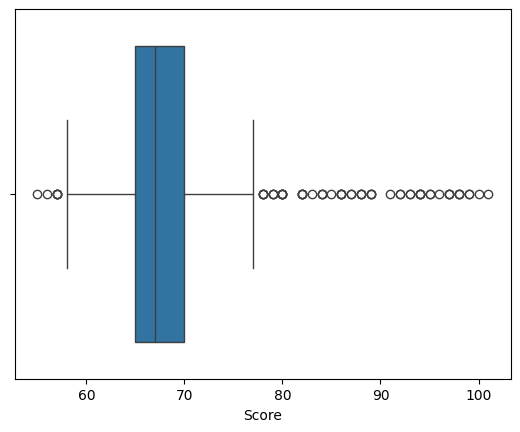

In [ ]:

sns.boxplot(x=df['Score'])
print("This boxplot shows that there are scores above 100, which are incorrect outliers.")

In [ ]:
#Removing scores above 100
df = df[df['Score'] <= 100]
df.describe()

,Attendance,Tutoring,Score
count,4985.000000,4985.000000,4985.000000
mean,80.045135,1.576128,67.354062
std,11.560009,1.301573,4.131129
min,60.000000,0.000000,55.000000
25%,70.000000,1.000000,65.000000
50%,80.000000,1.000000,67.000000
75%,90.000000,2.000000,70.000000
max,100.000000,8.000000,100.000000


Text(0.5, 1.0, 'Checking attendance outliers')

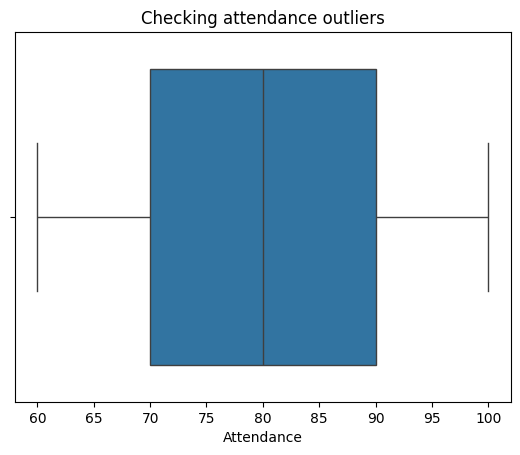

In [ ]:
sns.boxplot(x=df['Attendance'])
plt.title("Checking attendance outliers")

This boxplot does not show any extreme attendance outliers.

Text(0.5, 1.0, 'Checking tutoring outliers')

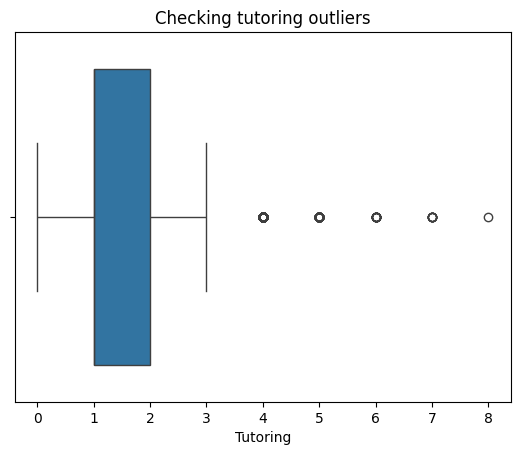

In [ ]:
#Tutoring Outliers
sns.boxplot(x=df['Tutoring'])
plt.title("Checking tutoring outliers")

This boxplot does show some tutoring outliers, but it is still plausible that a student did that many tutoring sessions, so I choose not to remove it.

In [ ]:
#Checking that my categorical data has no input/typo errors
expected_values = ['Low', 'Medium', 'High']

#Checking the 'Income' column
income = df[~df['Income'].isin(expected_values)]['Income'].unique()

#Checking the 'Involvement' column
involvement = df[~df['Involvement'].isin(expected_values)]['Involvement'].unique()

print("Unexpected values in 'Income':", income)
print("Unexpected values in 'Involvement':", involvement)

Unexpected values in 'Income': []
Unexpected values in 'Involvement': []


With no unexpected values in income or involvement, we can feel assured that there are no typos in the dataset and that each value is getting counted properly.

### 2-6. Generating Plot(s)

In [ ]:
#Descriptive Statistics for Score

minimum = np.min(df['Score'])
q1 = np.percentile(df['Score'], 25)
median = np.median(df['Score'])
q3 = np.percentile(df['Score'], 75)
maximum = np.max(df['Score'])
mean = np.mean(df['Score'])
std = np.std(df['Score'])

print(f"Minimum Score: {minimum}")
print(f"First Quartile (Q1): {q1}")
print(f"Median Score (Q2): {median}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum Score: {maximum}")
print(f"Mean Score: {mean}")
print(f"Standard Deviation of Score: {std}")

Minimum Score: 55
First Quartile (Q1): 65.0
Median Score (Q2): 67.0
Third Quartile (Q3): 70.0
Maximum Score: 100
Mean Score: 67.35406218655967
Standard Deviation of Score: 4.130714764000174


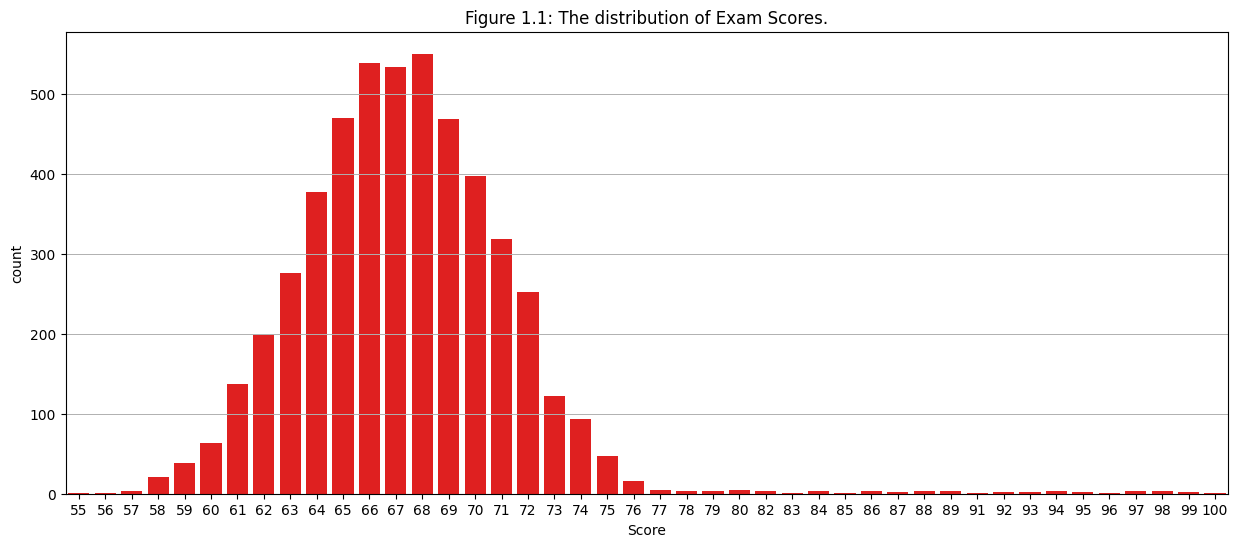

In [ ]:
#Displaying the distribution of Exam Scores
plt.figure(figsize=(15, 6))
sns.countplot(x=df['Score'], color='Red')

plt.title("Figure 1.1: The distribution of Exam Scores.")
plt.grid(True, which='major', axis='y',linewidth=0.7)

In [ ]:
#Descriptive Statistics for Tutoring

minimum = np.min(df['Tutoring'])
q1 = np.percentile(df['Tutoring'], 25)
median = np.median(df['Tutoring'])
q3 = np.percentile(df['Tutoring'], 75)
maximum = np.max(df['Tutoring'])
mean = np.mean(df['Tutoring'])
std = np.std(df['Tutoring'])

print(f"Minimum Tutoring Sessions: {minimum}")
print(f"First Quartile (Q1): {q1}")
print(f"Median Tutoring Sessions (Q2): {median}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum Tutoring Sessions: {maximum}")
print(f"Mean Tutoring Sessions: {mean}")
print(f"Standard Deviation of Tutoring Sessions: {std}")

Minimum Tutoring Sessions: 0
First Quartile (Q1): 1.0
Median Tutoring Sessions (Q2): 1.0
Third Quartile (Q3): 2.0
Maximum Tutoring Sessions: 8
Mean Tutoring Sessions: 1.5761283851554664
Standard Deviation of Tutoring Sessions: 1.3014427051973516


Text(0, 0.5, 'Count')

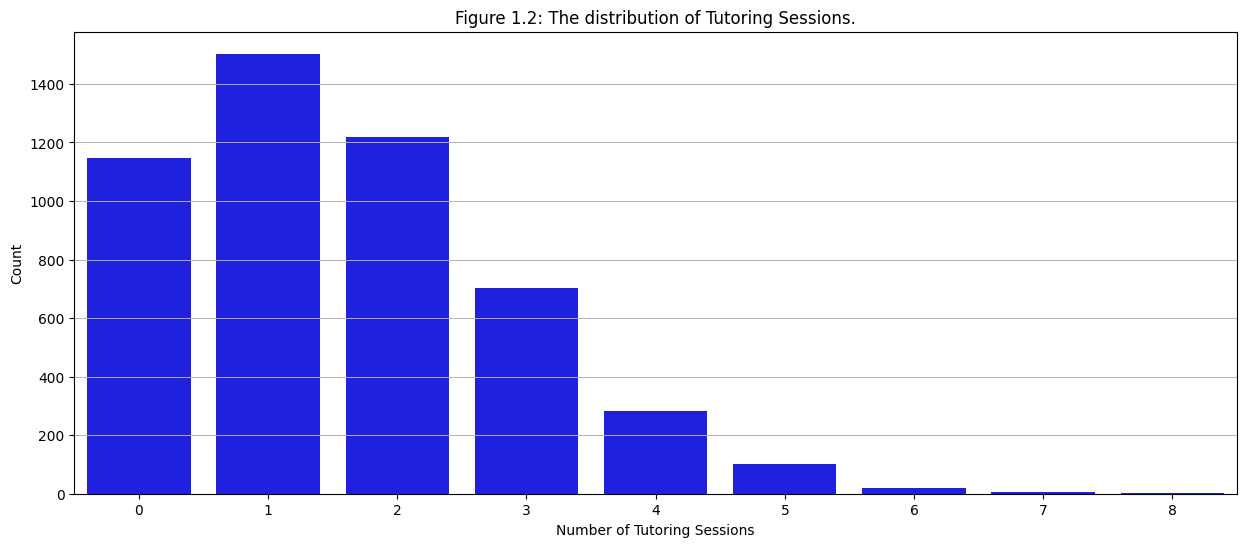

In [ ]:
#Displaying the distribution of Tutoring Sessions
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x=df['Tutoring'], color='Blue')

plt.title("Figure 1.2: The distribution of Tutoring Sessions.")
plt.grid(True, which='major', axis='y',linewidth=0.7)
ax.set_xlabel('Number of Tutoring Sessions')
ax.set_ylabel('Count')


In [ ]:
#Descriptive Statistics for Attendance
minimum = np.min(df['Attendance'])
q1 = np.percentile(df['Attendance'], 25)
median = np.median(df['Attendance'])
q3 = np.percentile(df['Attendance'], 75)
maximum = np.max(df['Attendance'])

print(f"Minimum Attendance: {minimum}")
print(f"First Quartile (Q1): {q1}")
print(f"Median Attendance (Q2): {median}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum Attendance: {maximum}")
print(f"Mean Attendance: {mean}")
print(f"Standard Deviation of Attendance: {std}")

Minimum Attendance: 60.0
First Quartile (Q1): 70.0
Median Attendance (Q2): 80.0
Third Quartile (Q3): 90.0
Maximum Attendance: 100.0
Mean Attendance: 1.5761283851554664
Standard Deviation of Attendance: 1.3014427051973516


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, '60.0'),
  Text(1, 0, '61.0'),
  Text(2, 0, '62.0'),
  Text(3, 0, '63.0'),
  Text(4, 0, '64.0'),
  Text(5, 0, '65.0'),
  Text(6, 0, '66.0'),
  Text(7, 0, '67.0'),
  Text(8, 0, '68.0'),
  Text(9, 0, '69.0'),
  Text(10, 0, '70.0'),
  Text(11, 0, '71.0'),
  Text(12, 0, '72.0'),
  Text(13, 0, '73.0'),
  Text(14, 0, '74.0'),
  Text(15, 0, '75.0'),
  Text(16, 0, '76.0'),
  Text(17, 0, '77.0'),
  Text(18, 0, '78.0'),
  Text(19, 0, '79.0'),
  Text(20, 0, '80.0'),
  Text(21, 0, '81.0'),
  Text(22, 0, '82.0'),
  Text(23, 0, '83.0'),
  Text(24, 0, '84.0'),
  Text(25, 0, '85.0'),
  Text(26, 0, '86.0'),
  Text(27, 0, '87.0'),
  Text(28, 0, '88.0'),
  Text(29, 0, '89.0'),
  Text(30, 0, '90.0'),
  Text(31, 0, '91.0'),
  Text(32, 0, '92.0'),
  Text(33, 0, 

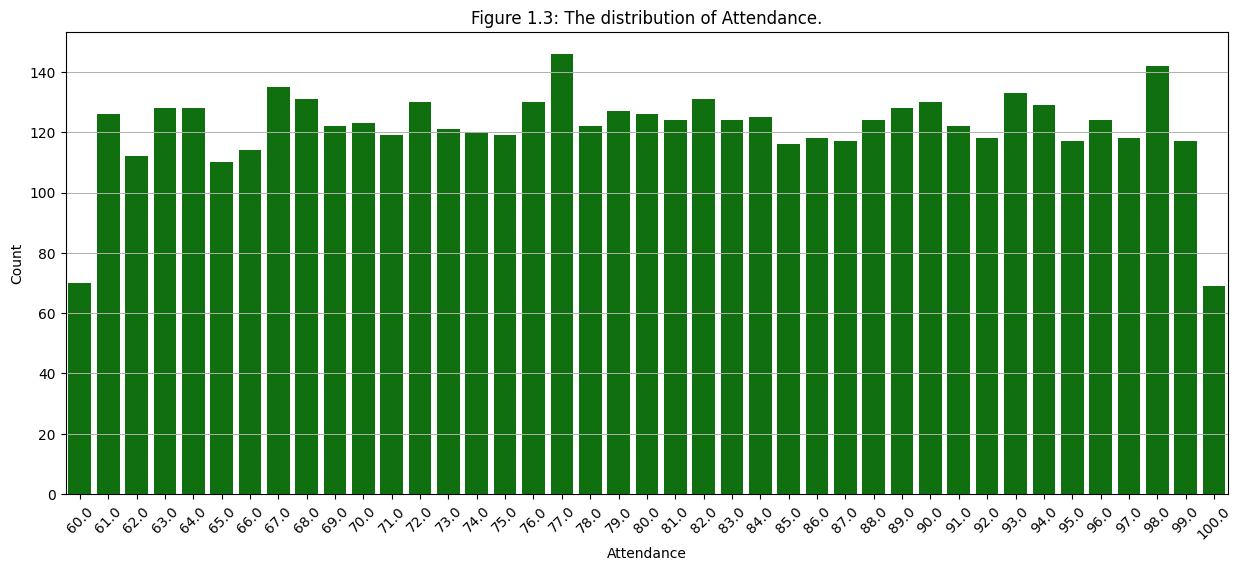

In [ ]:
#Displaying the distribution of Attendance
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x=df['Attendance'], color='Green')

plt.title("Figure 1.3: The distribution of Attendance.")
plt.grid(True, which='major', axis='y',linewidth=0.7)
ax.set_xlabel('Attendance')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

## 3. EDA


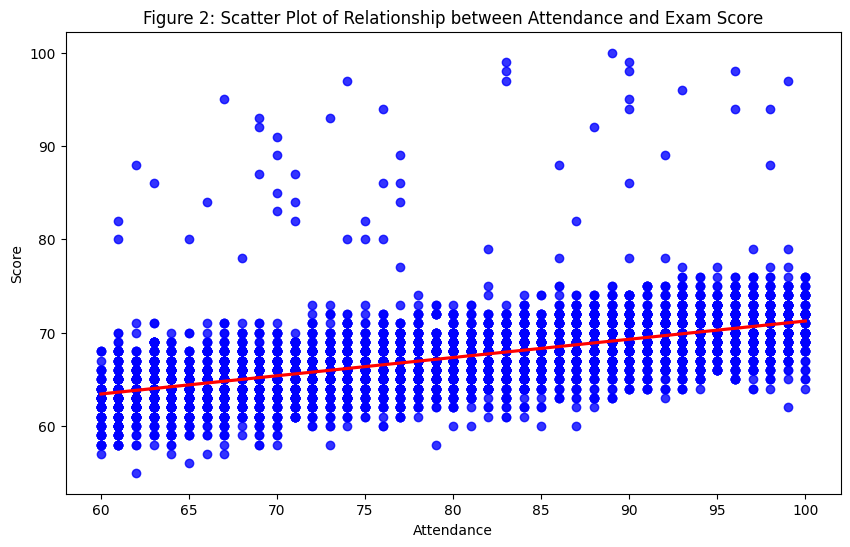

In [ ]:
#Relationship between Attendance and Exam Score
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='Attendance', y='Score', data=df, ax=ax, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('Attendance')
ax.set_ylabel('Score')
ax.set_title('Figure 2: Scatter Plot of Relationship between Attendance and Exam Score')
plt.show()

This graph indicates a slight positive correlation between Attendance and Exam Score.

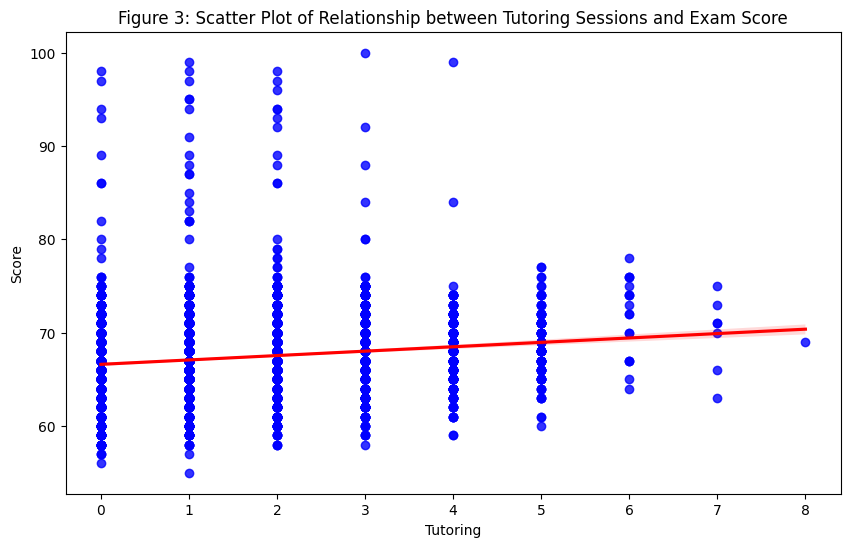

In [ ]:
#Relationship between Tutoring Sessions and Exam Score
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='Tutoring', y='Score', data=df, ax=ax, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('Tutoring')
ax.set_ylabel('Score')
ax.set_title('Figure 3: Scatter Plot of Relationship between Tutoring Sessions and Exam Score')
plt.show()

This scatter plot indicates a very slight positive correlation between number of Tutoring Sessions and Exam Score. Interestingly, all of the highest exams scores are with 4 or less tutoring sessions. This suggests that there could be a level where tutoring sessions no longer become very effective in raising exam score. Another explanation could be that the students who understand the material very well do not need tutoring sessions, which would explain the high scores of students who did no tutoring sessions.

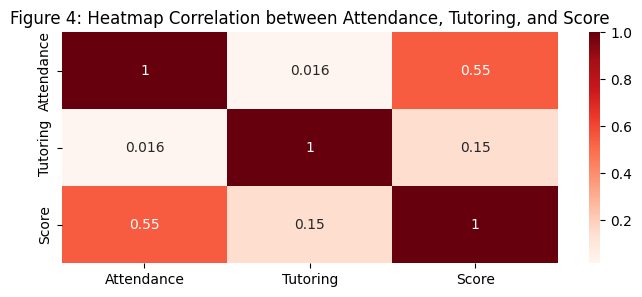

In [ ]:
#Heatmap between Attendance and Score
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 3))
correlation_matrix = numeric_columns.corr() #Creating the correlation
sns.heatmap(correlation_matrix, cmap="Reds", annot=True) #Putting the correlations over a heatmap
plt.title('Figure 4: Heatmap Correlation between Attendance, Tutoring, and Score')

plt.show()

This graph demonstrates the correlation between Tutoring Sessions, Attendance, and Exam Score. As we saw in the previous two graphs, there os a positive correlation but it is not extremely significant. The strongest correlation is between Attendance and Exam Score, indicating that Attendance has a bigger impact on a student's Exam Score than the number of Tutoring Sessions.

<ipython-input-33-d5c1085b192d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Involvement', y='Score', data=df, ax=axes[0], palette='Greens')
<ipython-input-33-d5c1085b192d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income', y='Score', data=df, ax=axes[1], palette='Blues')


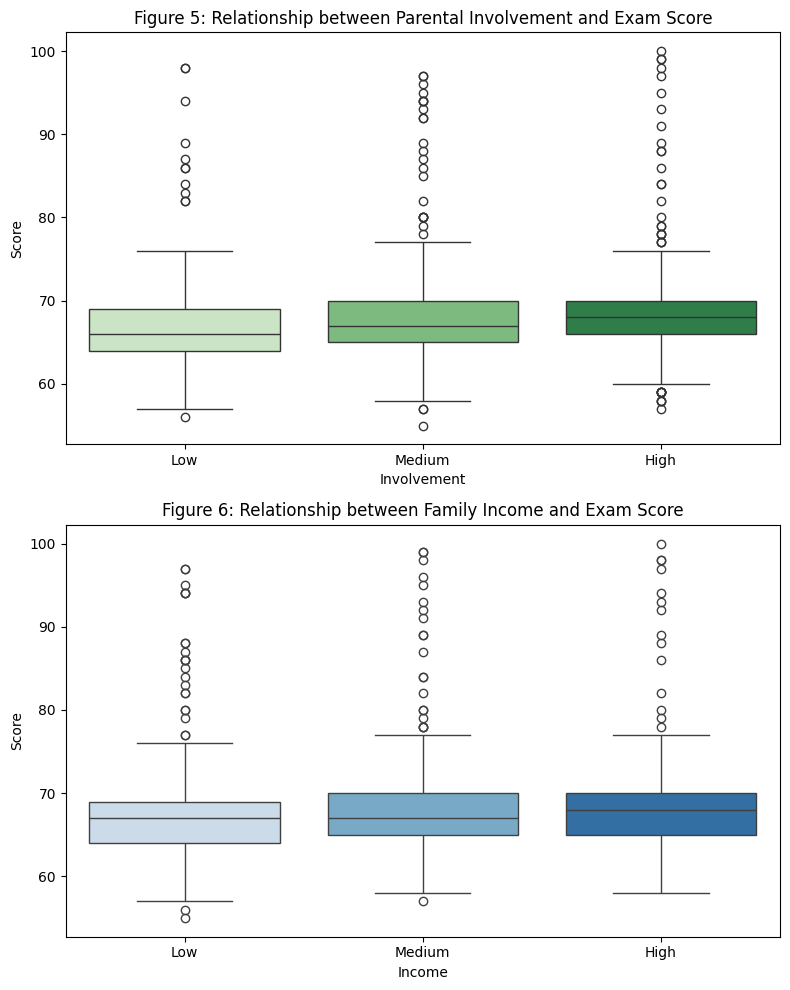

In [ ]:
#Subplots for the categorical data analysis

fig, axes = plt.subplots(2, 1, figsize=(8, 10)) #Creating two plots

#Boxplot for Parental Involvement and Score
sns.boxplot(x='Involvement', y='Score', data=df, ax=axes[0], palette='Greens')
axes[0].set_title('Figure 5: Relationship between Parental Involvement and Exam Score')
axes[0].set_xlabel('Involvement')
axes[0].set_ylabel('Score')

#Boxplot for Family Income and Score
sns.boxplot(x='Income', y='Score', data=df, ax=axes[1], palette='Blues')
axes[1].set_title('Figure 6: Relationship between Family Income and Exam Score')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

These boxplots demonstrate the relationships between Family Involvement and Score, and Family Income and Score.

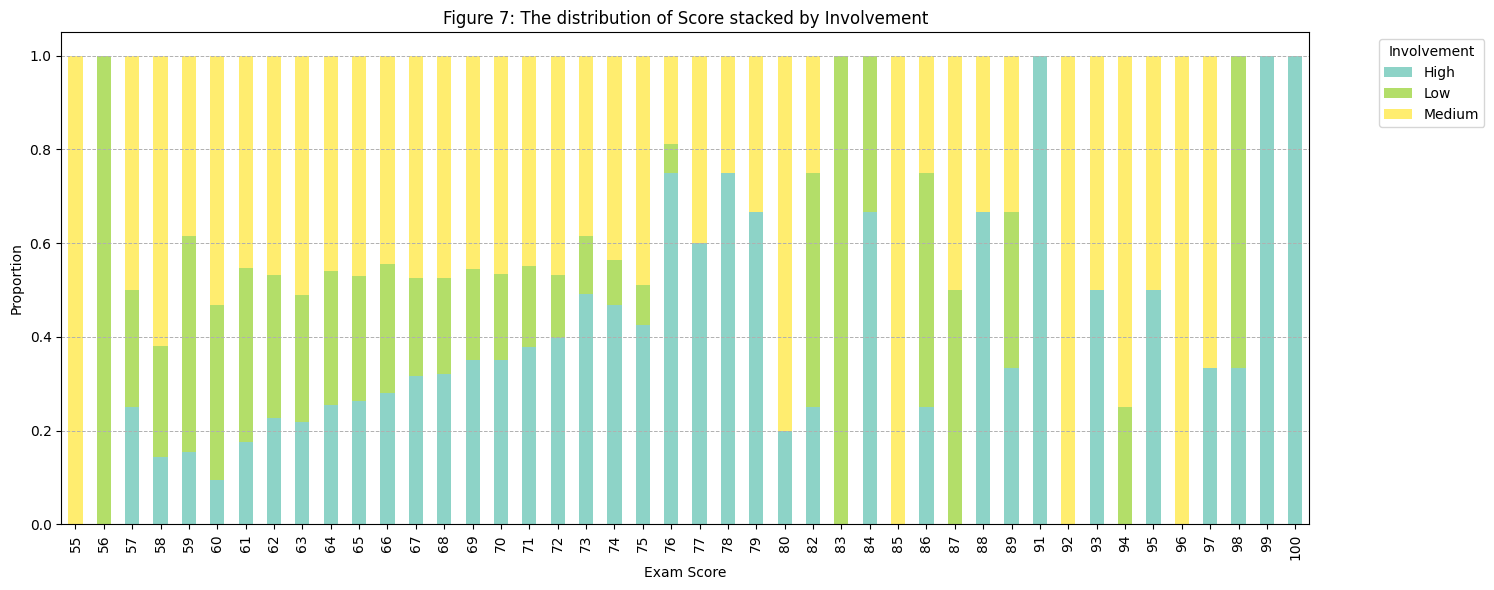

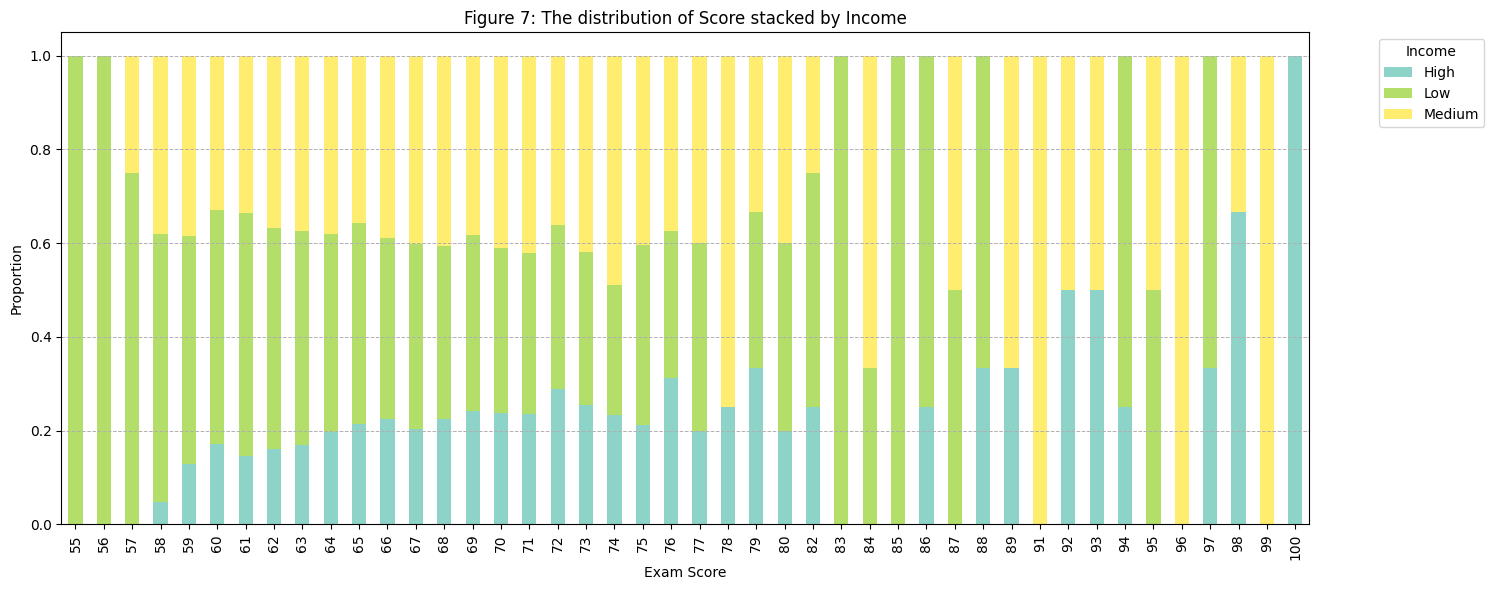

In [ ]:
for col in ['Involvement', 'Income']: #Creating a for loop to generate 2 plots for involvement and income

    graphs1 = pd.crosstab(df['Score'], df[col], normalize='index') #Creating a specific crosstab type of histogram

    ax = graphs1.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='Set3') #Plotting the graphs
    ax.set_xlabel('Exam Score')
    ax.set_ylabel('Proportion')

    plt.title(f"Figure 7: The distribution of Score stacked by {col}")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)


    plt.tight_layout()
    plt.show()

## 4. Conclusion



**What has a greater influence on a student's exam score, attendance or tutoring sessions?**

Based on the graphs above, and specifically looking at the correlation heat map, it is clear that in this dataset, attendance has a greater influence on student's exam score than the amount of tutoring sessions. On the heat map, the relationship between tutoring and exam score was only a slight positive correlation, at 0.15. The scatter plot for tutoring reiterates this weak positive correlation. The scatterplot also suggests that students with fewer tutoring sessions (specifically four or less) often achieve the highest exam scores. This might indicate that strong students require less tutoring.

The correlation between attendance and exam score was higher, at 0.55. This demonstrates a stronger association between attendance and exam scores.


**Is parental involvement a factor in a student's exam score?**

Figure 5 is a boxplot that depicts the relationship between parental involvement and student exam scores. The boxplot shows a positive correlation between higher levels of parental involvement and higher exam scores.

The crosstab histogram also supports this argument,with low parental involvement being less and less visible as student score increases. Students with higher parental involvement generally perform better on exams, though the spread of scores suggests that even with high involvement, some variability exists.

However, the data shows that parental involvement is still a factor in academic performance. This supporst the idea that students who receive more engagement from their parents tend to do better academically.


**Is family income associated with better academic performance?**

The boxplot for family income also suggests a positive correlation between family income levels and exam scores. Students from higher-income families generally scored better, therefore family income is associated with better academic performance. The crosstab histogram also shows that students from higher-income families usually score better, with more medium and high income levels being represented in the higher end of the exam scores.


However, there were still some students from low income families that scored highly. This suggests that while family income can contribute to academic performance, other factors (like attendance or personal study habits) also play a role.

## 5. Summary

In this analysis, I compared four different factors that contribute to student exam performance, which was my dependent variable. My four independent variables were attendance, tutoring sessions, parental involvement, and family income. My research questions included asking whether attendance or tutoring sessions had a greater impact on test scores, and if parental involvement or family income were factors.

My analysis revealed that attendance plays the most significant role in influencing student exam scores, with a correlation coefficient of 0.55. This positive relationship suggests that regular attendance contributes directly to higher academic performance. In contrast, tutoring sessions show only a slight positive correlation of 0.15, indicating that while tutoring may offer some benefit, it is not as critical a factor in determining exam outcomes. Interestingly, students who received fewer tutoring sessions often achieved higher scores, suggesting that stronger students may require less external support.

Parental involvement also emerged as an important factor, with a positive association between higher involvement and better exam scores. Although there is variability, the data supports the idea that parental engagement helps academic success. Similarly, the analysis shows that family income is positively correlated with exam performance, but this influence is less decisive, as some lower-income students still performed well. This suggests that while income can contribute to success, other factors such as attendance and study habits play critical roles.

In conclusion, regular class attendance and parental involvement are key drivers of student success, with tutoring and family income playing more secondary, yet still important, roles.

In the future, I think it would be interesting to explore phone screen time, specifically time spent on social media, and how that relates to how a student scores on an exam. I would predict that a higher time spent on social media would indicate a lower exam score, because that would mean more time spent distracted and not studying. It would be interesting to examine the impact of social media as a whole on how students are doing in school, and I am sure this will become an increasingly relevant area of research.

## References

> Location of Dataset https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download

> https://www.kaggle.com/code/quantum09/exploring-student-performance-factors

> STAT650 Lecture17 Descriptive Statistics

> STAT650 Lecture08 Overview EDA by Python



In [ ]:
%shell jupyter nbconvert --to html /content/STAT650_Midterm_Project_Hayley_Hawkins_.ipynb

[NbConvertApp] Converting notebook /content/STAT650_Midterm_Project_Hayley_Hawkins_.ipynb to html
[NbConvertApp] Writing 1207506 bytes to /content/STAT650_Midterm_Project_Hayley_Hawkins_.html
